# Chapter 6: Making Predictions Using the Central Limit Theorem and SciPy

In [19]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2


def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)


def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])


def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

In [12]:
# 6.1 Manipulating the Normal Distribution using SciPy
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size

# The head count frequency is identitcal to the mean
assert head_count_frequency == sample.mean()

In [13]:
# Computing 100000 head-count frequencies
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

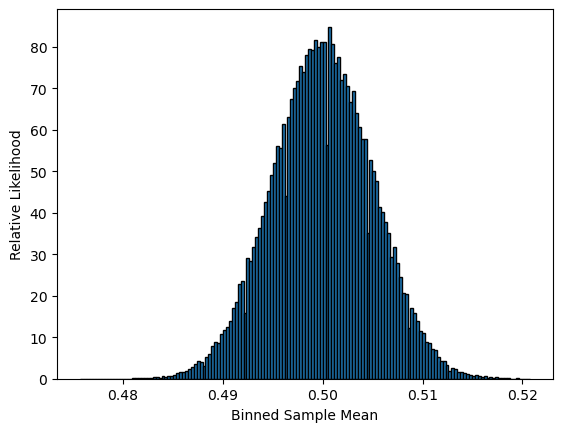

In [14]:
# Visualizing sample means in a histogram
sample_means = frequencies
likelihoods, bin_edges, _ = plt. hist(sample_means, bins='auto', edgecolor='k', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [16]:
# Computing the mean and standard deviation of a histogram
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [17]:
# In a graph, the standard deviation and mean can be computed from the distribution's peak coordinates
# x-value = distribution's mean
# (y-value)^-1 * (2*pi)^(1/2) = standard deviation
# Computing mean and standard deviation from peak coordinates
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2 * math.pi) ** 0.5) ** -1
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [20]:
# Computing mean and standard deviation using stats.norm.fit
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


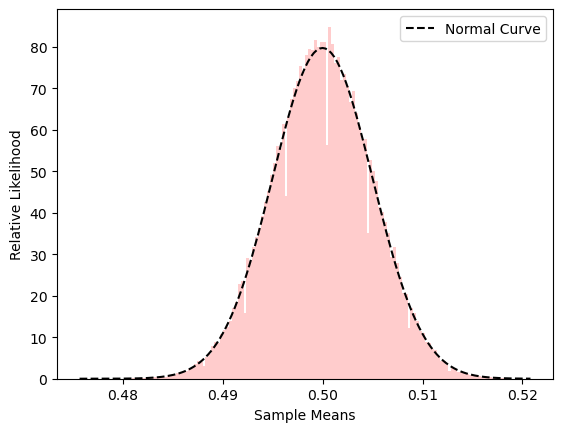

In [23]:
# Probability Density Function: Like a probability mass function that returns likelihoods rather than probabilities
# Computing normal likelihoods using stats.norm.pdf
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Means')
plt.ylabel('Relative Likelihood')
plt.show()

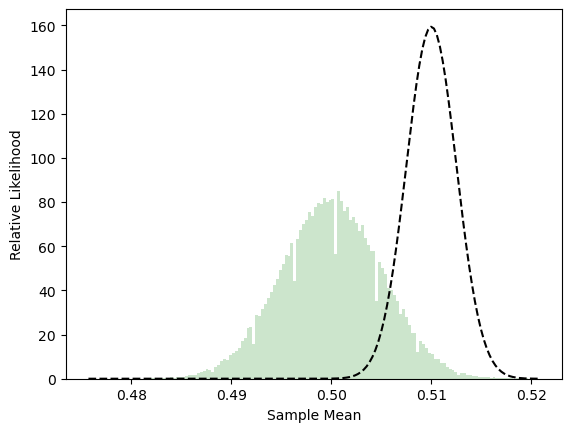

In [25]:
# Manipulating a normal curve's peak coordinates
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01, fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='g', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

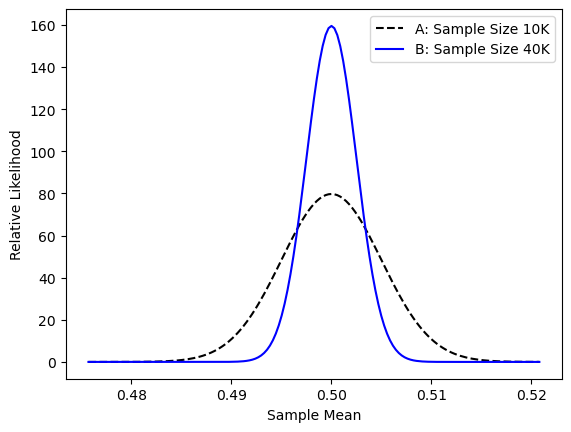

In [26]:
# 6.1.1 Comparing two sampled normal curves
# Plotting two curves with different sample sizes
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [27]:
# Computing a confidence interval using SciPy's stats.norm.interval()
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"The true mean of the sampled binomial distribution is between {start:.3f} and {end:.3f}")

The true mean of the sampled binomial distribution is between 0.495 and 0.505


In [28]:
# Confirming the Bernoulli mean
assert stats.binom.mean(1, 0.5) == 0.5

In [29]:
# Variance is based on sample size, so an increase by fourfold should increase the variance by fourfold
# Assessing shift in variance after increased sampling
variance_ratio = (new_std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.2f}")

The ratio of variances is approximately 0.25


In [30]:
# Assessing shift in variance after decreased sampling
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size)
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


In [31]:
# Predicting variance for a sample of size 1
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")

Estimated variance for a sample size of 1 is 0.25


In [32]:
# Confirming the predicted variance for a sample size of 1
assert stats.binom.var(1, 0.5) == 0.25

In [35]:
# 6.2 Determining the mean and variance of a population through random sampling
# Generating a random population of 50000
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)

In [36]:
# Computing the population mean and variance
population_mean = population_ages.mean()
population_variance = population_ages.var()

In [37]:
# Simulating 10 randomly interviewed people
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

In [38]:
# Comparing the sample mean to the population mean
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"There is a {percent_diff_means:.2f} percent difference between means.")

There is a 27.59 percent difference between means.


In [39]:
# Computing sample means across 1000 people
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() for _ in range(100)]

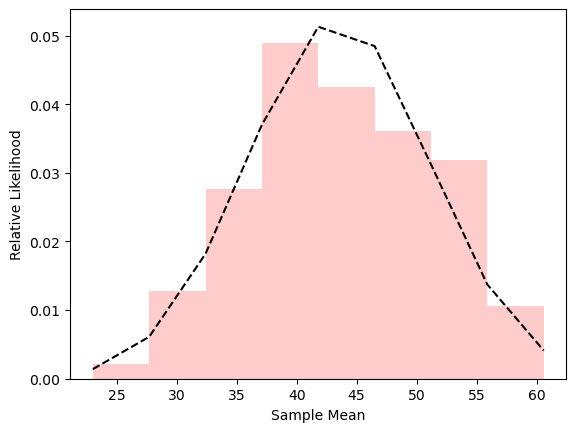

In [41]:
# Fitting sample means to a normal curve
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [42]:
# Comparing the normal mean to the population mean
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")

Actual population mean is approximately 42.53
There is a 2.17% difference between means.


In [43]:
# Estimating the population variance
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size

In [44]:
# Comparing the estimated variance to the population variance
print(f"Estimated variance is approximately {estimated_variance:.2f}")
print(f"Actual variance is approximately {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"There is a {percent_diff_var:.2f} percent difference between variances.")

Estimated variance is approximately 576.73
Actual variance is approximately 584.33
There is a 1.30 percent difference between variances.


In [45]:
# 6.3 Making predictions using the mean and variance
# Population mean and variance of recorded grades
population_mean = 84
population_variance = 25

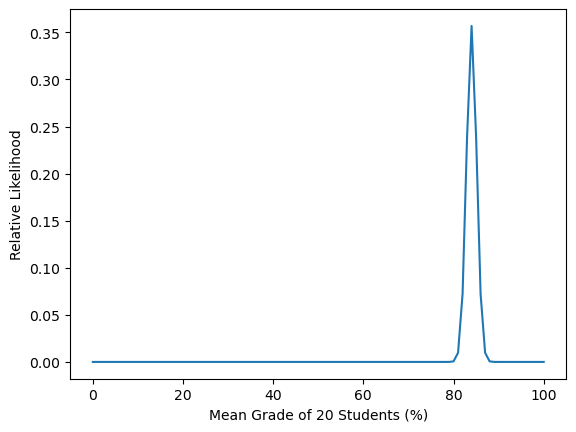

In [46]:
# Standard Error of the Mean (SEM): By definition equals the population standard deviation divided by the 
#     square root of the sample size. Can be obtained through taking the square root of the variance
# Plotting a normal curve using the mean and SEM
mean = population_mean
population_std = population_variance ** 0.5
sem = population_std / (20 ** 0.5)
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean Grade of 20 Students (%)')
plt.ylabel('Relative Likelihood')
plt.show()

In [48]:
# 6.3.1 Computing the area beneath a normal curve
# Approximating the area using the trapezoidal rule
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2 for i in range (normal_likelihoods.size - 1)])

# np.trapz is much more efficient
assert total_area == np.trapz(normal_likelihoods)
print(f"Estimated area under the curve is {total_area}")

Estimated area under the curve is 1.0000000000384808


In [49]:
# Survival Function: Equals the distribution's area over an interval that's greater than some x
# Computing the total area using SciPy
assert stats.norm.sf(0, mean, sem) == 1.0

In [50]:
# Inputting the mean into the survival function
assert stats.norm.sf(mean, mean, sem) == 0.5
estimated_area = np.trapz(normal_likelihoods[mean:])
print(f"Estimated area beyond the mean is {estimated_area}")

Estimated area beyond the mean is 0.5000000000192404


In [51]:
# Computng the probability of a good collective grade
area = stats.norm.sf(90, mean, sem)
print(f"Probability of 20 students acing the exam is {area}")

Probability of 20 students acing the exam is 4.012555633463782e-08


In [52]:
# 6.3.2 Interpreting the computed probability
# The computed prob is approx 1 in 25 million

In [53]:
# Key Words / Notes:
# A normal distribution's mean and standard deviation are determined by the x and y coordinates of its peak
# The mean is equal to the x coordinate of the peak
# The standard deviation is equal to the inverse of the y coordinate multiplied by (2 * pi) ** (1/2)
# Probability Density Function: Maps inputted float values to their likelihood weights. Taking the area
#     underneath that curve produces a probability
# Standard Error of the Mean (SEM): Equals the population standard deviation divided by the square root of the sample size
#    Dividing the population variance by the sample size and then taking the square root also produces the SEM
# Trapezoidal Rule: Allows us to estimate the area under a curve by decomposng that curve into trapezoidal units
#     then we simply sum over the areas of each trapezoid
# Survival Function: Measures a distribution's area over an interval that's greater than some x
# We must make cautious assumptions while making inferences from limited data